In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [48]:
def show_img(mat):
    return plt.matshow(mat)

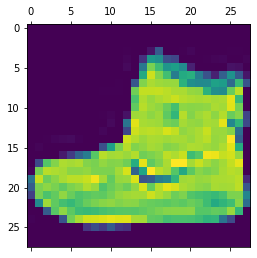

In [12]:
show_img(X_train[0])

In [14]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']  #Taken from Keras Docs

In [15]:
X_train_sc = X_train/255
X_test_sc = X_test/255

In [19]:
model = Sequential([
                    Flatten(input_shape = (28,28)),
                    Dense(32, activation = 'relu'),
                    Dense(10, activation = 'sigmoid')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [23]:
model.fit(X_train_sc, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4320 - accuracy: 0.8483
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4001 - accuracy: 0.8580
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3807 - accuracy: 0.8655
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3694 - accuracy: 0.8682
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3600 - accuracy: 0.8704
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3519 - accuracy: 0.8745
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3445 - accuracy: 0.8754
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3398 - accuracy: 0.8773
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3346 - accuracy: 0.8797
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.329

In [24]:
model.evaluate(X_test_sc, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.4089 - accuracy: 0.8562


[0.40893056988716125, 0.8561999797821045]

In [33]:
y_pred = model.predict(X_test_sc)

In [34]:
y_pred[0]

array([3.4139246e-02, 1.7669797e-04, 4.1602463e-02, 2.3663342e-03,
       2.8376460e-02, 9.9800742e-01, 9.1089100e-02, 9.8956859e-01,
       4.1717839e-01, 9.9956030e-01], dtype=float32)

In [38]:
y_pred_labels = [np.argmax(i) for i in y_pred]

Actuals: Ankle boot
Predicted: Ankle boot


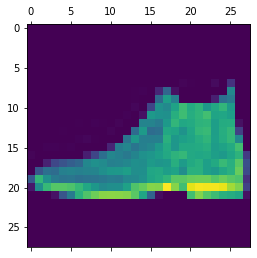

In [47]:
#Verifying the Results
show_img(X_test[0])
print('Actuals:', str(labels[np.argmax(y_pred[0])]))
print('Predicted:', str(labels[y_test[0]]))

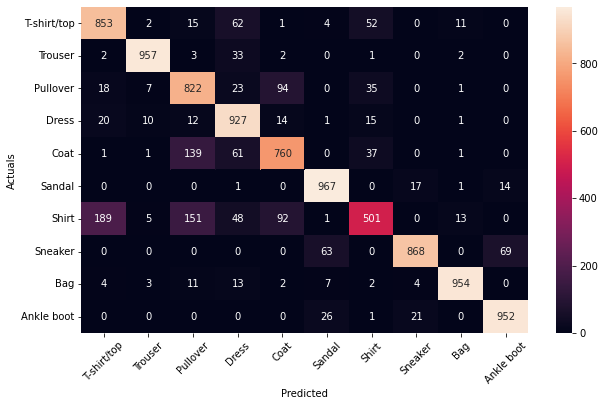

In [76]:
cm = tf.math.confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize = (10,6))
sns.heatmap(cm, fmt = 'g', annot = True, xticklabels = labels, yticklabels = labels)
plt.xticks(rotation = 45)
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.show()

### Model 2

In [54]:
model2 = Sequential([
                    Flatten(input_shape = (28,28)),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'sigmoid')
])

In [55]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [56]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [57]:
model2.fit(X_train_sc, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5550 - accuracy: 0.8034
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3961 - accuracy: 0.8564
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3610 - accuracy: 0.8674
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3349 - accuracy: 0.8751
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3161 - accuracy: 0.8838
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.8875
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2903 - accuracy: 0.8923
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2815 - accuracy: 0.8954
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2716 - accuracy: 0.8988
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.262

In [58]:
model2.evaluate(X_test_sc, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3474 - accuracy: 0.8741


[0.3473844826221466, 0.8741000294685364]

In [59]:
y_pred_2 = model2.predict(X_test_sc)

In [62]:
y_pred_2_labels = [np.argmax(i) for i in y_pred_2]

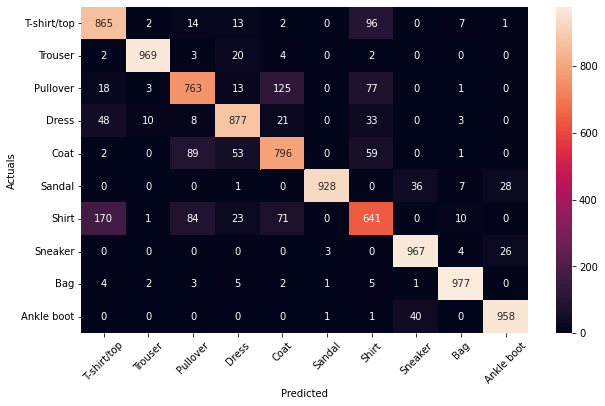

In [75]:
cm2 = tf.math.confusion_matrix(y_test, y_pred_2_labels)

plt.figure(figsize = (10,6))
sns.heatmap(cm2, fmt = 'g', annot = True, xticklabels = labels, yticklabels = labels)
plt.xticks(rotation = 45)
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.show()

In [77]:
# A lot of Shirts were Predicted as Tshirt/top
# Also, a lot of Pullovers were predicted as Coat

# Both the cases make sense as Tshirt and Shirt may look smae from front except for buttons
# Also, few small size coats looks same as Pullovers, with minimal attention to buttons.